In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import tree
import graphviz 

In [2]:
# plotting parameters
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.facecolor'] = 'w'

In [3]:
# load scraped data
df_raw = pd.read_csv('../data/Personal_Movies_Ratings_Features.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UID                         339 non-null    int64  
 1   My_Rating                   339 non-null    float64
 2   Budget                      329 non-null    object 
 3   Cumulative_Worldwide_Gross  302 non-null    object 
 4   Production_Company1         339 non-null    object 
 5   Synopsis                    331 non-null    object 
 6   Top_250_Rank                75 non-null     float64
 7   Country1                    339 non-null    object 
 8   Director1                   339 non-null    object 
 9   Genre1                      339 non-null    object 
 10  Genre2                      314 non-null    object 
 11  Genre3                      246 non-null    object 
 12  Rating                      339 non-null    float64
 13  Runtime                     339 non

# Preprocess Features

In [4]:
# df_raw.Runtime.describe()
# df_raw.Votes.describe()
# df_raw.Year.describe()
# df_raw.Rating.describe()

In [5]:
feature_columns = ['Rating', 'Votes'] #, 'Runtime', 'Year']

In [6]:
# create feature matrix
X = df_raw.loc[:, feature_columns].values
X.shape

(339, 2)

In [7]:
# binarize my rating
y = (df_raw.My_Rating > 3).astype(int)
y.shape

(339,)

# Split into Train/Test set

In [8]:
np.random.seed(123)

In [9]:
df_test = df_raw.sample(frac=0.1).copy()
train_index = (~df_raw.UID.isin(df_test.UID))
df_train = df_raw.loc[train_index, :].copy()

In [10]:
X_train = X[train_index, :]
X_test = X[~train_index, :]
y_train = y[train_index]
y_test = y[~train_index]

In [11]:
y_train.value_counts()

1    187
0    118
Name: My_Rating, dtype: int64

In [12]:
# accuracy of predicting the most-frequent class
np.mean(np.ones(y_train.shape[0]) == y_train)

0.6131147540983607

# Decision Tree

In [13]:
clf = tree.DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
clf.score(X_train, y_train)

0.7540983606557377

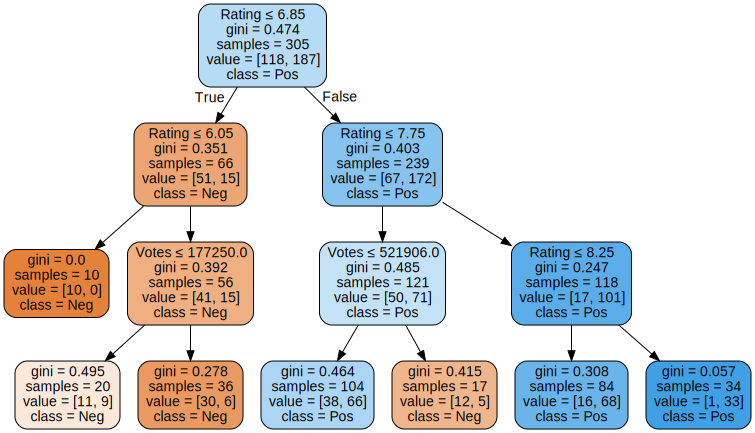

In [14]:
# graphical view of tree
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=feature_columns,
                                class_names=['Neg', 'Pos'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph 

In [15]:
# text view of tree
print(tree.export_text(clf, feature_names=feature_columns))

|--- Rating <= 6.85
|   |--- Rating <= 6.05
|   |   |--- class: 0
|   |--- Rating >  6.05
|   |   |--- Votes <= 177250.00
|   |   |   |--- class: 0
|   |   |--- Votes >  177250.00
|   |   |   |--- class: 0
|--- Rating >  6.85
|   |--- Rating <= 7.75
|   |   |--- Votes <= 521906.00
|   |   |   |--- class: 1
|   |   |--- Votes >  521906.00
|   |   |   |--- class: 0
|   |--- Rating >  7.75
|   |   |--- Rating <= 8.25
|   |   |   |--- class: 1
|   |   |--- Rating >  8.25
|   |   |   |--- class: 1



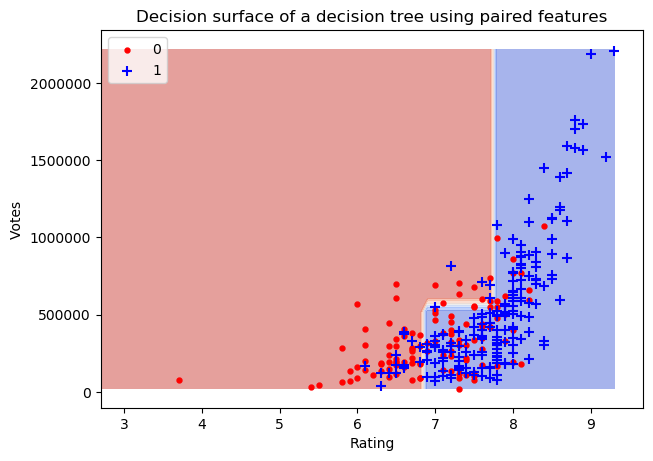

In [16]:
# Plot the decision boundary
X = X_train
y = y_train

# Parameters
n_classes = 2
plot_colors = "rb"
plot_step_x = 0.1
plot_step_y = 100000

# https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + plot_step_x
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + plot_step_y
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step_x), np.arange(y_min, y_max, plot_step_y))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm_r, alpha=0.5)
plt.xlabel(feature_columns[0])
plt.ylabel(feature_columns[1])
# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=[0, 1][i], marker=['.', '+'][i], cmap=plt.cm.coolwarm_r, s=50)

# plt.yscale('log')
plt.title('Decision surface of a decision tree using paired features')
plt.legend(loc='upper left')
plt.show()

In [17]:
# feature importance
clf.feature_importances_

array([0.86912055, 0.13087945])

# Repeat for pairs of features

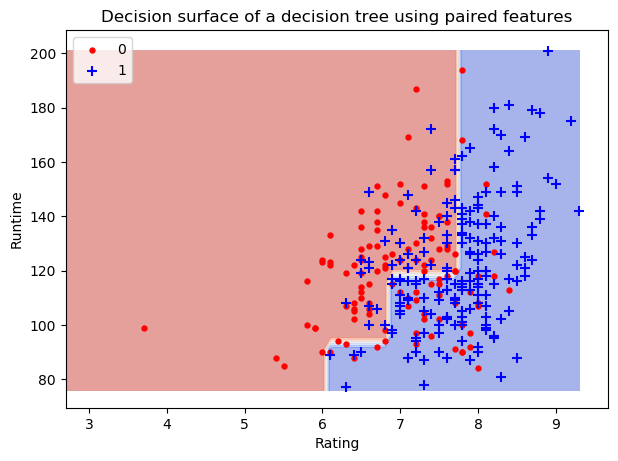

In [18]:
feature_columns = ['Rating', 'Runtime']
X_train = df_train.loc[:, feature_columns].values
clf = tree.DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
# Plot the decision boundary
X = X_train
y = y_train
# Parameters
n_classes = 2
plot_colors = "rb"
plot_step_x = 0.1
plot_step_y = 5
# https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + plot_step_x
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + plot_step_y
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step_x), np.arange(y_min, y_max, plot_step_y))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm_r, alpha=0.5)
plt.xlabel(feature_columns[0])
plt.ylabel(feature_columns[1])
# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=[0, 1][i], marker=['.', '+'][i], cmap=plt.cm.coolwarm_r, s=50)
# plt.yscale('log')
plt.title('Decision surface of a decision tree using paired features')
plt.legend(loc='upper left')
plt.show()

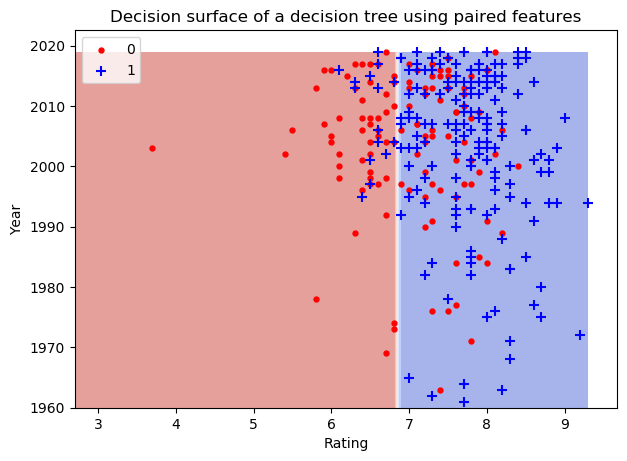

In [19]:
feature_columns = ['Rating', 'Year']
X_train = df_train.loc[:, feature_columns].values
clf = tree.DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
# Plot the decision boundary
X = X_train
y = y_train
# Parameters
n_classes = 2
plot_colors = "rb"
plot_step_x = 0.1
plot_step_y = 0.5
# https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + plot_step_x
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + plot_step_y
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step_x), np.arange(y_min, y_max, plot_step_y))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm_r, alpha=0.5)
plt.xlabel(feature_columns[0])
plt.ylabel(feature_columns[1])
# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=[0, 1][i], marker=['.', '+'][i], cmap=plt.cm.coolwarm_r, s=50)
# plt.yscale('log')
plt.title('Decision surface of a decision tree using paired features')
plt.legend(loc='upper left')
plt.show()